## Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating the Directory
import os

# Define the directory path
directory = "/content/drive/My Drive/MasterCourse/MedIns Recognizer"

# Check if it exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")
else:
    print(f"Directory already exists: {directory}")

Created directory: /content/drive/My Drive/MasterCourse/MedIns Recognizer


In [ ]:
%cd /content/drive/My Drive/MasterCourse/MedIns Recognizer

/content/drive/My Drive/MasterCourse/MedIns Recognizer


## Downloading Images from Browser using built-in fastai library and hugginface

In [ ]:
# Define labels for the Medical Instrument Classifier
med_ins_labels = [
    "Scalpel",
    "Thermometer",
    "Forceps",
    "Bone Saw",
    "Reflex Hammer",
    "Ultrasound Probe",
    "Defibrillator",
    "Otoscope",
    "ECG Machine",
    "Glucometer"
]

# Print the number of categories
len(med_ins_labels)

10

In [ ]:
# Downloading Images
data_path = "data"
if not os.path.exists(data_path):
    os.mkdir(data_path)

for instrument in med_ins_labels:  # Using medical instrument labels
    dest = f"{data_path}/{instrument}"

    if not os.path.exists(dest):
        os.mkdir(dest)

    try:
        instrument_image_urls = search_images_ddg(instrument, max_images=200)  # Fetch 200 images per label
        download_images(dest, urls=instrument_image_urls)

    except:
        continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#1870) [Path('data/Scalpel/98878703-1003-4960-85ee-182afaa1b436.jpg'),Path('data/Scalpel/f8b65d9f-e0d3-4cf0-9ce9-0bbd0dc0bfb9.jpg'),Path('data/Scalpel/1f07a26c-2450-4817-a8f2-c7d78120578c.jpg'),Path('data/Scalpel/a1399bd6-d1af-4445-b8c4-39996c83f8f1.png'),Path('data/Scalpel/2b2ba6b3-60d7-4bbf-9087-0a260f700e77.jpg'),Path('data/Scalpel/cad0df94-4725-47b2-9c20-a8221fa5b9f4.jpg'),Path('data/Scalpel/6319c0e7-dff6-430a-843a-7b061b9ff602.jpg'),Path('data/Scalpel/e529ba65-de5c-4926-a2c7-d59964468afd.png'),Path('data/Scalpel/f4dbcaf6-db64-4d98-89e7-62386352c387.jpg'),Path('data/Scalpel/e1e8af88-898a-4060-973b-94d6f570f3d3.jpg'),Path('data/Scalpel/3c32573d-8d16-4870-8780-61d21ab29f95.jpg'),Path('data/Scalpel/8729e7f6-4290-4072-b8d7-294e2e87a774.jpg'),Path('data/Scalpel/255e7bb8-95ac-4175-907e-1eb9bbe32541.jpg'),Path('data/Scalpel/9248da89-cf03-4f74-964a-0f5441309f38.jpg'),Path('data/Scalpel/29675587-4bed-41c4-9d78-70a16fc10ca0.jpg'),Path('data/Scalpel/2254d6b8-67c7-4f2f-a7a9-c6a33913ec49.jpg')

In [ ]:
failed = verify_images(image_counts)
failed

(#141) [Path('data/Scalpel/3c32573d-8d16-4870-8780-61d21ab29f95.jpg'),Path('data/Scalpel/8729e7f6-4290-4072-b8d7-294e2e87a774.jpg'),Path('data/Scalpel/29675587-4bed-41c4-9d78-70a16fc10ca0.jpg'),Path('data/Scalpel/502210ac-b2b5-4332-8f2e-e8d017bf78f3.jpg'),Path('data/Scalpel/20224bfe-ffa5-48a7-a2c6-d9e2b27a344c.jpg'),Path('data/Scalpel/f286d7b8-36a4-417b-ba37-35d8a0e724d5.jpg'),Path('data/Scalpel/d47ea49c-f626-47ba-949c-980e4985bb19.jpg'),Path('data/Scalpel/d128ad6e-87d8-4700-a210-c46aabdd5c15.jpg'),Path('data/Scalpel/6679c6dd-e49d-471f-bb4a-fb046c6cccf9.jpg'),Path('data/Scalpel/7517a085-3f5e-4821-9ccc-627a345f19c3.jpg'),Path('data/Scalpel/61d10dbc-a82e-4cc5-8ebd-d42d92227b30.jpg'),Path('data/Scalpel/6fc622b4-95f5-4763-8cf0-c6c1af834614.svg'),Path('data/Scalpel/f826524e-6707-423a-8884-5d8b266f86df.jpg'),Path('data/Scalpel/8657e9f0-ab06-4d15-a91e-8729d041e41b.jpg'),Path('data/Scalpel/c50b462f-586c-4865-93cc-351305452d00.jpg'),Path('data/Scalpel/f92402f9-b23e-427b-bbff-f411413d91a8.jpg'),

In [ ]:
# Removing Corrupt or Failed Images
failed.map(Path.unlink)

(#141) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

## From Data to Dataloaders

In [ ]:
doc(DataBlock)

,Type,Default,Details,
blocks,list,None,One or more `TransformBlock`s,
dl_type,TfmdDL,None,"Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`",
getters,list,None,Getter functions applied to results of `get_items`,
n_inp,int,None,Number of inputs,
item_tfms,list,None,"`ItemTransform`s, applied on an item",
batch_tfms,list,None,"`Transform`s or `RandTransform`s, applied by batch",
get_items,NoneType,None,,
splitter,NoneType,None,,
get_y,NoneType,None,,
get_x,NoneType,None,,


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

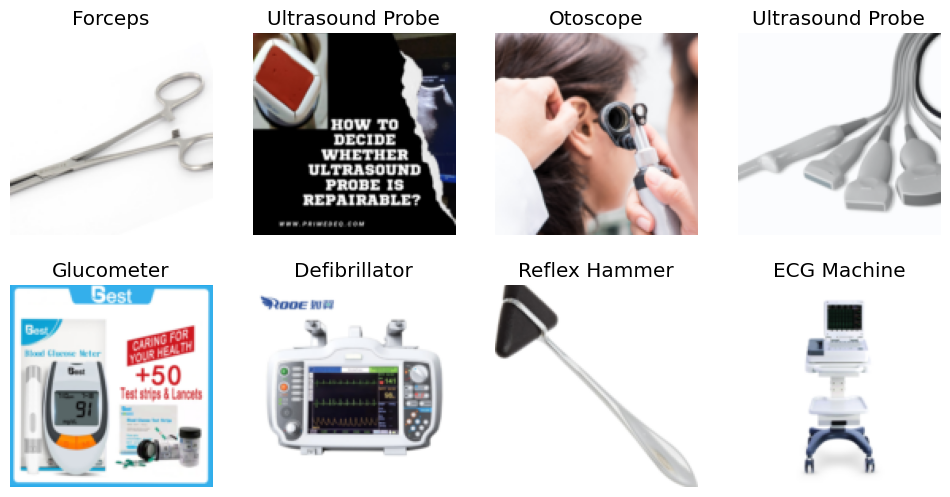

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

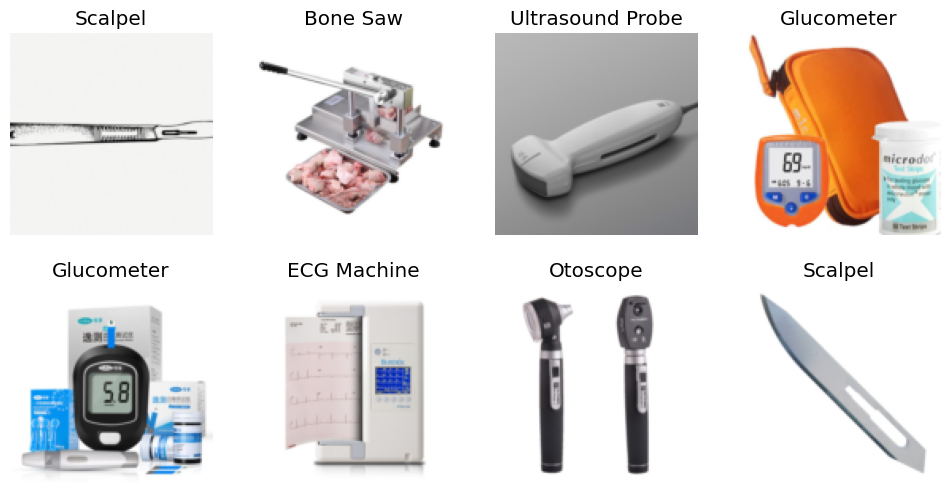

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

## Data Augmentation

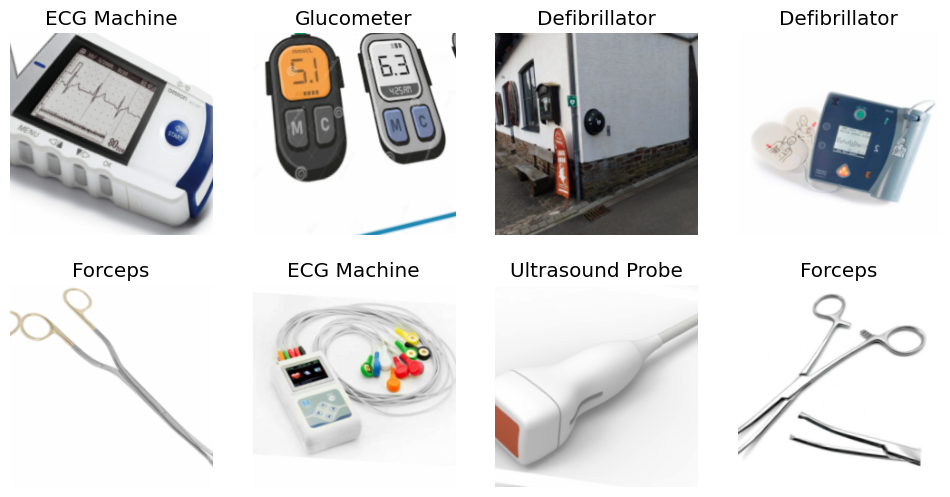

In [ ]:
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "medins_dataloader_v0.pkl")